## Example for binning and correlating data

This example shows how to use some pre-built methods to bin two sets of data in time so that they can be compared to look for correlations.

In [1]:
# Importing local python package
import sys
sys.path.append(r'C:/Users/ahanks/E11-git/Activities/')
sys.path.append('.')
import LabMethods

In [2]:
# importing other python tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
import requests

### Import and prepare data from our Etcheverry sensor system

We will use radiation data like we've seen before, but we are also going to take a look at some weather data:
* "https://radwatch.berkeley.edu/test/tmp/dosenet/etch_roof.csv"
* "https://radwatch.berkeley.edu/test/tmp/dosenet/etch_roof_weather.csv"

#### Make methods for importing this data so we don't have to write all of the steps every time we want to import new data.

In [3]:
def get_web_data(url):
    header = {
      "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
      "X-Requested-With": "XMLHttpRequest"
    }
    s = requests.get(url, headers=header).text
    data = pd.read_csv(io.StringIO(s))
    return data

In [4]:
url = "https://radwatch.berkeley.edu/test/tmp/dosenet/etch_roof_weather.csv"
weather_data = get_web_data(url)
weather_data

,deviceTime_utc,deviceTime_local,deviceTime_unix,temperature,pressure,humidity,error_flag
0,2017-11-17 18:40:49+00:00,2017-11-17 10:40:49-08:00,1.510944e+09,17.57,1008.59,52.71,NaN
1,2017-11-17 18:45:49+00:00,2017-11-17 10:45:49-08:00,1.510944e+09,17.04,1008.65,54.04,NaN
2,2017-11-17 18:50:49+00:00,2017-11-17 10:50:49-08:00,1.510945e+09,16.58,1008.61,54.75,NaN
3,2017-11-17 18:55:49+00:00,2017-11-17 10:55:49-08:00,1.510945e+09,16.39,1008.62,56.20,NaN
4,2017-11-17 19:00:49+00:00,2017-11-17 11:00:49-08:00,1.510945e+09,16.20,1008.62,57.27,NaN
...,...,...,...,...,...,...,...
219885,2021-04-23 23:10:40+0000,2021-04-23 16:10:40-0700,1.619219e+09,14.54,1002.84,63.66,0.0
219886,2021-04-23 23:15:40+0000,2021-04-23 16:15:40-0700,1.619220e+09,14.19,1002.80,65.44,0.0
219887,2021-04-23 23:20:41+0000,2021-04-23 16:20:41-0700,1.619220e+09,14.87,1002.69,64.47,0.0
219888,2021-04-23 23:25:40+0000,2021-04-23 16:25:40-0700,1.619220e+09,14.92,1002.80,63.25,0.0


#### Cut down the data - focus on the weather data for now
* Keep only the relevant columns (time, temperature, humidity, pressure)
* Select only the last month

In [12]:
weather_data_cut = weather_data.loc[:,"deviceTime_local":"humidity"]
time_mask = weather_data_cut['deviceTime_local']>'2021-03-22 00:00:00:-07:00'
weather_month = weather_data_cut[time_mask]
weather_month

,deviceTime_local,deviceTime_unix,temperature,pressure,humidity
211035,2021-03-22 00:00:42-0700,1.616396e+09,13.50,1009.12,57.35
211036,2021-03-22 00:05:42-0700,1.616397e+09,13.80,1009.21,56.52
211037,2021-03-22 00:10:42-0700,1.616397e+09,13.84,1009.22,56.06
211038,2021-03-22 00:15:41-0700,1.616397e+09,13.58,1009.20,56.81
211039,2021-03-22 00:20:42-0700,1.616398e+09,13.54,1009.16,56.90
...,...,...,...,...,...
219885,2021-04-23 16:10:40-0700,1.619219e+09,14.54,1002.84,63.66
219886,2021-04-23 16:15:40-0700,1.619220e+09,14.19,1002.80,65.44
219887,2021-04-23 16:20:41-0700,1.619220e+09,14.87,1002.69,64.47
219888,2021-04-23 16:25:40-0700,1.619220e+09,14.92,1002.80,63.25


#### Correlating data from same sensor

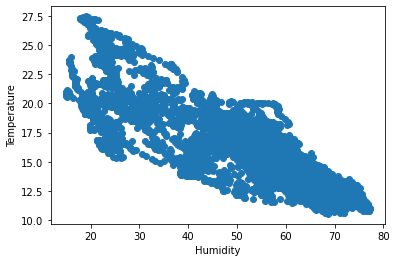

In [13]:
plt.scatter(weather_month['humidity'].values,weather_month['temperature'].values)
plt.ylabel("Temperature")
plt.xlabel("Humidity")
plt.show()

### Quantifying this relationship

We can define a correlation coeefficient ($\rho$, or $r_{xy}$ to describe how correlated these two variables, Temperature(y) and Humidity(x), are, taking into account the **variance** of in each variable, and the **covariance** - how much the two variable vary together.

$r_{xy} = \frac{Cov(x,y)}{\sigma_{x}\sigma_{y}}$

$r_{xy} = \frac{\sum_{i=0}^{N}(x_{i}-\mu_{x})(y_{i}-\mu_{y})}{\sqrt\sum_{i=0}^{N}(x_{i}-\mu_{x})^{2}\sqrt\sum_{i=0}^{N}(y_{i}-\mu_{y})^{2}}$

This is known as the Pearson correlation - and there is already a statistics library for python that defines this method as `pearsonr`. You can then call this method to look at the correlation between two sets of data (data1 and data2):

    import scipy.stats
    scipy.stats.pearsonr(data1, data2)


In [16]:
import scipy.stats

r, p = scipy.stats.pearsonr(weather_month['humidity'].values, weather_month['temperature'].values)
print("Humidity vs Temp: corr. coeff. = {}, p-value = {}".format(r**2, p))

r_press, p_press = scipy.stats.pearsonr(weather_month['humidity'].values, weather_month['pressure'].values)

r_sqr = r_press**2
print("Humidity vs Pressure: corr. coeff. = {}, p-value = {}".format(r_press, p_press))

Humidity vs Temp: corr. coeff. = 0.709002696217848, p-value = 0.0
Humidity vs Pressure: corr. coeff. = -0.09723277598519417, p-value = 4.723827718325913e-20


###### NOTE 1: The square of this correlation coefficient is the fraction (%) of all variation in each data set that can be explained by the variation in the other data set.

###### NOTE 2: The second measure of correlation is the statistical significance of the measured correlation coefficient.

The significance can be estimated by the probability that a randomized sampling of the x and y would produce the same correlation coefficient:

1. Randomize the x and y data sets (this will break any real correlation)
2. Measure the correlation for this new set of x and y measurements
3. Do this many times - the probability of getting a correlation strength greater than that measured in the original data indicates how confident we can be that the correlation is real


In [10]:
import random

rand_temp = np.copy(weather_month['temperature'].values)
print(rand_temp)
random.shuffle(rand_temp)
print(rand_temp)

rand_hum = np.copy(weather_month['humidity'].values)
print(rand_hum)
random.shuffle(rand_hum)
print(rand_hum)

scipy.stats.pearsonr(weather_month['humidity'].values, weather_month['temperature'].values)
scipy.stats.pearsonr(rand_hum, rand_temp)

[13.5  13.8  13.84 ... 14.87 14.92 14.57]
[12.83 15.3  11.93 ... 14.12 20.96 19.41]
[57.35 56.52 56.06 ... 64.47 63.25 64.31]
[44.49 30.77 75.07 ... 45.09 21.07 45.26]


(-0.013986733731422764, 0.18815916536042862)

### Explore the correlation between the two types of radiation data we have available (8pts)
For this we will look at the "local" copies of this data because of the large size of the d3s data set.
* etch_roof.csv
* etch_roof_d3s.csv

These have been downloaded with a path of this format: 

    C:/Users/<user-name>/<path-to-file>/<filename>

In [17]:
data1 = pd.read_csv(r"C:/Users/ahanks/Downloads/etch_roof.csv")

data2 = pd.read_csv(r"C:/Users/ahanks/Downloads/etch_roof_d3s.csv")


In [23]:
time_mask = (data1['deviceTime_local']>'2020-08-17 00:00:00:-07:00') & (data1['deviceTime_local']<'2020-09-17 00:00:00:-07:00')
data1_cut = data1[time_mask]
data1_cut

,deviceTime_utc,deviceTime_local,deviceTime_unix,cpm,cpmError,error_flag
321523,2020-08-17 07:00:51+0000,2020-08-17 00:00:51-0700,1.597648e+09,2.0,0.632456,0.0
321524,2020-08-17 07:05:51+0000,2020-08-17 00:05:51-0700,1.597648e+09,3.4,0.824621,0.0
321525,2020-08-17 07:10:51+0000,2020-08-17 00:10:51-0700,1.597648e+09,2.8,0.748331,0.0
321526,2020-08-17 07:15:51+0000,2020-08-17 00:15:51-0700,1.597649e+09,1.8,0.600000,0.0
321527,2020-08-17 07:20:51+0000,2020-08-17 00:20:51-0700,1.597649e+09,3.0,0.774597,0.0
...,...,...,...,...,...,...
330408,2020-09-17 06:35:42+0000,2020-09-16 23:35:42-0700,1.600325e+09,2.6,0.721110,0.0
330409,2020-09-17 06:40:42+0000,2020-09-16 23:40:42-0700,1.600325e+09,3.2,0.800000,0.0
330410,2020-09-17 06:45:42+0000,2020-09-16 23:45:42-0700,1.600325e+09,1.8,0.600000,0.0
330411,2020-09-17 06:50:42+0000,2020-09-16 23:50:42-0700,1.600325e+09,3.4,0.824621,0.0


In [24]:
time_mask = (data2['deviceTime_local']>'2020-08-17 00:00:00:-07:00') & (data2['deviceTime_local']<'2020-09-17 00:00:00:-07:00')
data2_cut = data2[time_mask]
data2_cut

,deviceTime_utc,deviceTime_local,deviceTime_unix,cpm,cpmError,keV_per_ch,0,1,2,3,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,error_flag
200809,2020-08-17 07:01:09+0000,2020-08-17 00:01:09-0700,1.597648e+09,2323.6,21.557365,2.57,0,0,0,0,...,0,0,0,0,0,1,0,0,72,0.0
200810,2020-08-17 07:06:09+0000,2020-08-17 00:06:09-0700,1.597648e+09,2335.4,21.612034,2.57,0,0,0,0,...,0,0,0,0,0,1,0,0,67,0.0
200811,2020-08-17 07:11:09+0000,2020-08-17 00:11:09-0700,1.597648e+09,2320.8,21.544373,2.57,0,0,0,0,...,0,0,0,0,0,0,0,0,63,0.0
200812,2020-08-17 07:16:09+0000,2020-08-17 00:16:09-0700,1.597649e+09,2260.6,21.263114,2.57,0,0,0,0,...,0,0,0,0,0,0,0,0,56,0.0
200813,2020-08-17 07:21:09+0000,2020-08-17 00:21:09-0700,1.597649e+09,2274.8,21.329791,2.57,0,0,0,0,...,0,0,0,0,0,0,0,0,72,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209728,2020-09-17 06:37:04+0000,2020-09-16 23:37:04-0700,1.600325e+09,2309.2,21.490463,2.57,0,0,0,0,...,0,0,0,0,0,0,0,0,53,0.0
209729,2020-09-17 06:42:04+0000,2020-09-16 23:42:04-0700,1.600325e+09,2286.2,21.383171,2.57,0,0,0,0,...,0,1,0,0,0,0,0,0,49,0.0
209730,2020-09-17 06:47:05+0000,2020-09-16 23:47:05-0700,1.600325e+09,2294.8,21.423352,2.57,0,0,0,0,...,0,0,0,0,0,0,0,0,82,0.0
209731,2020-09-17 06:52:05+0000,2020-09-16 23:52:05-0700,1.600326e+09,2308.0,21.484878,2.57,0,0,0,0,...,0,1,0,0,0,0,0,0,60,0.0


#### You may find you need to cut outliers from your data - check the time series first (not shown here)

In [25]:
# It looks like we want to cut out those outliers in the forst set of CPM data
# - in the time series we can see that there was a time when the detector was clearly malfunctioning
# - we can use our knowledge of the distribution for this, and cut based on the variance
data1_mean = np.mean(data1_cut['cpm'].values)
data1_std = np.std(data1_cut['cpm'].values)
data1_cut2 = data1_cut.copy()
data_mask = data1_cut2['cpm']<data1_mean+3*data1_std
data1_cut2 = data1_cut2[data_mask]
# zero counts also means the detector is malfunctioning
data_mask = data1_cut2['cpm']>0
data1_cut2 = data1_cut2[data_mask]


#### We will import some tools for binning this data to match dates correctly when trying to look at correlations.

In [26]:
# The rebin units are minutes, so this is making 5 minute bins
#  - for larger time intervals within each data bin, just increase this value (so hour intervals would be rebin=60)
rebin=5
data1_binned, data2_binned = LabMethods.bin_correlation_data(data1_cut2, data2_cut,rebin)

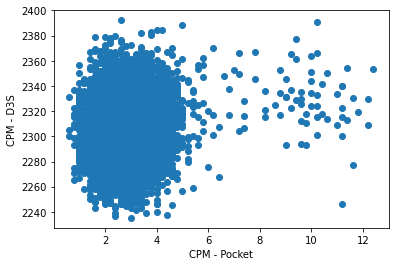

In [27]:
plt.scatter(data1_binned['cpm'],data2_binned['cpm'])
plt.xlabel("CPM - Pocket")
plt.ylabel("CPM - D3S")
plt.show()

In [28]:
r_counts, p_counts = scipy.stats.pearsonr(data1_binned['cpm'].values, data2_binned['cpm'].values)

r_sqr = r_counts**2
print("The proportion of the variance in the Pocket Geiger described by the D3S is:",r_sqr)
print("corr. coeff. = {}, p-value = {}".format(r_counts, p_counts))

The proportion of the variance in the Pocket Geiger described by the D3S is: 0.00750831712271911
corr. coeff. = 0.08665054600358332, p-value = 6.938934129974739e-16


This correlation is about as weak as it can be. But the p-value suggests that it is still a significant correlation. We would expect these to be correlated since they are supposed to be measuring the same thing - radiation in the local environment - and they are in the same location.

It is likely that the very week correlation is related to the large relative uncertainties in the counting statistics for the small counting detector (the Pocket Geiger).

If you go back and rebin to combine statistics - say over an hour or two - you can see this directly. The correlation will get stronger as we reduce the intrinsic relative statistical uncertainties for each set of counts.